In [39]:
import pandas as pd
df = pd.read_csv('anomaly.csv')
print(df.head())

       Date  Power  Detector Quality
0  1-Jan-16     96         8    Good
1  2-Jan-16     96        10    Good
2  3-Jan-16     91         8    Good
3  4-Jan-16     97         9    Good
4  5-Jan-16     91        11    Good


In [40]:
df.drop(['Date'], axis = 1, inplace= True)
df.dropna(inplace=True, axis=1)

In [41]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
print(len(df_train))
print(len(df_test))

1168
293


In [42]:
from sklearn import metrics
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [43]:
model = Sequential()
model.add(Dense(10, activation = 'relu', input_dim=2))
model.add(Dense(3,activation = 'relu'))
model.add(Dense(10,activation = 'relu'))
model.add(Dense(2))
model.compile(loss='mean_squared_error', optimizer = 'adam')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                30        
                                                                 
 dense_13 (Dense)            (None, 3)                 33        
                                                                 
 dense_14 (Dense)            (None, 10)                40        
                                                                 
 dense_15 (Dense)            (None, 2)                 22        
                                                                 
Total params: 125 (500.00 Byte)
Trainable params: 125 (500.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
df_train.drop(['Quality'],axis = 1, inplace= True)
model.fit(df_train,df_train,verbose=1, epochs=100)

Epoch 1/100
37/37 [==============================] - 1s 2ms/step - loss: 4700.6509
Epoch 2/100
37/37 [==============================] - 0s 3ms/step - loss: 3144.2952
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 1539.1945
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 429.4225
Epoch 5/100
37/37 [==============================] - 0s 2ms/step - loss: 78.9110
Epoch 6/100
37/37 [==============================] - 0s 2ms/step - loss: 14.6601
Epoch 7/100
37/37 [==============================] - 0s 2ms/step - loss: 3.9814
Epoch 8/100
37/37 [==============================] - 0s 2ms/step - loss: 2.7060
Epoch 9/100
37/37 [==============================] - 0s 2ms/step - loss: 2.5876
Epoch 10/100
37/37 [==============================] - 0s 2ms/step - loss: 2.5770
Epoch 11/100
37/37 [==============================] - 0s 2ms/step - loss: 2.5720
Epoch 12/100
37/37 [==============================] - 0s 2ms/step - loss: 2.5684
Epoch 13/100
37/37 [====

In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                30        
                                                                 
 dense_13 (Dense)            (None, 3)                 33        
                                                                 
 dense_14 (Dense)            (None, 10)                40        
                                                                 
 dense_15 (Dense)            (None, 2)                 22        
                                                                 
Total params: 125 (500.00 Byte)
Trainable params: 125 (500.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
df_test


,Power,Detector
892,95,12
1105,94,12
413,99,12
522,100,5
1036,92,9
...,...,...
1361,110,10
802,99,7
651,95,12
722,113,9


In [47]:
df_test_quality = df_test['Quality']
# print(df_test_quality)
# print(np.sqrt(metrics.mean_squared_error(df_test_quality)))

In [48]:
df_test.drop(['Quality'],axis = 1, inplace= True)
pred_test = model.predict(df_test)
score2 = np.sqrt(metrics.mean_squared_error(pred_test,df_test))
print(score2)

10/10 [==============================] - 0s 3ms/step
1.4994450258855614


In [49]:
pred_test

array([[ 95.24764  ,  10.161836 ],
       [ 94.26562  ,  10.079364 ],
       [ 99.17576  ,  10.491723 ],
       [ 99.35621  ,   9.472508 ],
       [ 91.95804  ,   9.442273 ],
       [ 91.95804  ,   9.442273 ],
       [ 98.079216 ,  10.251865 ],
       [ 96.98267  ,  10.012012 ],
       [ 99.17576  ,  10.491723 ],
       [ 94.151115 ,   9.921983 ],
       [ 95.13313  ,  10.004455 ],
       [ 81.04124  ,   8.377719 ],
       [ 95.88615  ,   9.772157 ],
       [ 94.26562  ,  10.079364 ],
       [113.4481   ,  11.099249 ],
       [110.84556  ,  11.323983 ],
       [ 92.75962  ,  10.543954 ],
       [ 98.079216 ,  10.251865 ],
       [114.88816  ,  11.811246 ],
       [100.04327  ,  10.41681  ],
       [ 99.814255 ,  10.102041 ],
       [ 98.079216 ,  10.251865 ],
       [ 99.585236 ,   9.787276 ],
       [ 95.77163  ,   9.614774 ],
       [ 92.07255  ,   9.59966  ],
       [ 64.3468   ,   6.975717 ],
       [ 94.789604 ,   9.532303 ],
       [ 91.09052  ,   9.517188 ],
       [ 98.19373  ,

In [108]:
df_test

,Power,Detector
892,95,12
1105,94,12
413,99,12
522,100,5
1036,92,9
...,...,...
1361,110,10
802,99,7
651,95,12
722,113,9


In [85]:
thresholds = [1.5, 1.7, 2.0]

df2=df_test.copy()
for threshold in thresholds:
    df2[f'Detection_{threshold}'] = ""
# df2['Detection_1.5'][892] = 'apple'
# df2.at[892,'Detection_1.5'] = 'banana'
# print(df_test.index[0])

indexes = df_test.index
for i in range(len(df_test)):
    input_data = df_test.values[i].reshape(1, -1) 
    print(input_data) 
    pred = model.predict(input_data)
    mse = np.sqrt(metrics.mean_squared_error(pred, input_data))
    print(mse)
    

    for threshold in thresholds:
        col_name = f'Detection_{threshold}'
        if mse >= threshold:
            df2.at[indexes[i], col_name] = 'Bad'

        else:
            df2.at[indexes[i], col_name] = 'Good'

df2['actual_value'] = df_test_quality
print(df2)
df2.to_csv('test_values.csv', index=False)





[[95 12]]
1/1 [==============================] - 0s 29ms/step
1.3115210999801938
[[94 12]]
1/1 [==============================] - 0s 28ms/step
1.3710188386728202
[[99 12]]
1/1 [==============================] - 0s 29ms/step
1.0737308976819824
[[100   5]]
1/1 [==============================] - 0s 27ms/step
3.1951354984588685
[[92  9]]
1/1 [==============================] - 0s 31ms/step
0.3141360674973008
[[92  9]]
1/1 [==============================] - 0s 30ms/step
0.3141360674973008
[[98 11]]
1/1 [==============================] - 0s 28ms/step
0.5319675409819524
[[97 10]]
1/1 [==============================] - 0s 27ms/step
0.014904425515253611
[[99 12]]
1/1 [==============================] - 0s 27ms/step
1.0737308976819824
[[94 11]]
1/1 [==============================] - 0s 29ms/step
0.7697269269314234
[[95 11]]
1/1 [==============================] - 0s 43ms/step
0.7102248918778938
[[81  8]]
1/1 [==============================] - 0s 31ms/step
0.2686752567380398
[[96  9]]
1/1 [=========

In [101]:
test_onepointfive = df2['Detection_1.5']
test_onepointseven = df2['Detection_1.7']
test_two = df2['Detection_2.0']
test_actual = df2['actual_value']

test_onepointfive = test_onepointfive.to_frame()
test_onepointseven = test_onepointseven.to_frame()
test_two = test_two.to_frame()
test_actual = test_actual.to_frame()

[[ 64  23]
 [  2 204]]


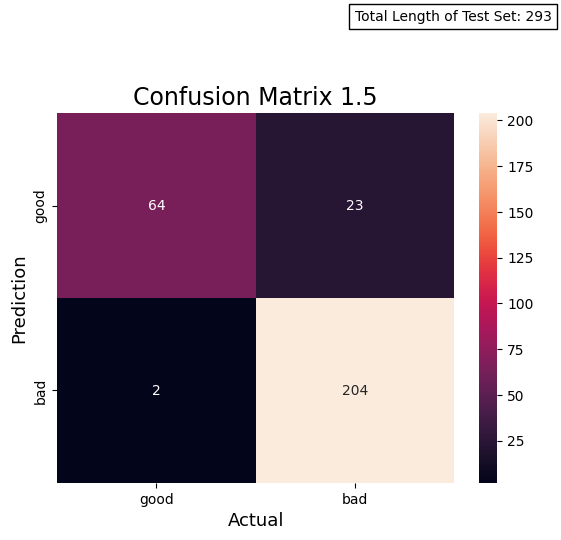

In [105]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

confusion = confusion_matrix(test_actual, test_onepointfive)
print(confusion)
sns.heatmap(confusion, 
            annot=True,
            fmt='g', 
            xticklabels=['good', 'bad'],
            yticklabels=['good', 'bad'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix 1.5',fontsize=17)

total_length = len(test_actual)
plt.text(1.5, -0.5, f'Total Length of Test Set: {total_length}', fontsize=10,
         bbox=dict(facecolor='white'))

plt.show()



[[ 56  31]
 [  0 206]]


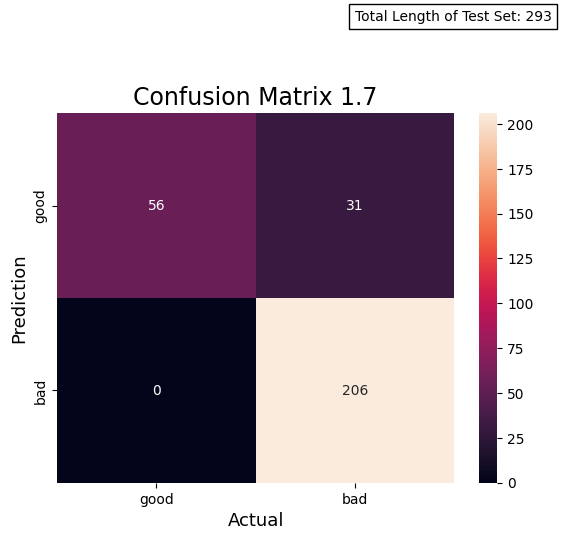

In [106]:
confusion = confusion_matrix(test_actual, test_onepointseven)
print(confusion)
sns.heatmap(confusion, 
            annot=True,
            fmt='g', 
            xticklabels=['good', 'bad'],
            yticklabels=['good', 'bad'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix 1.7',fontsize=17)

total_length = len(test_actual)
plt.text(1.5, -0.5, f'Total Length of Test Set: {total_length}', fontsize=10,
         bbox=dict(facecolor='white'))

plt.show()

[[ 45  42]
 [  0 206]]


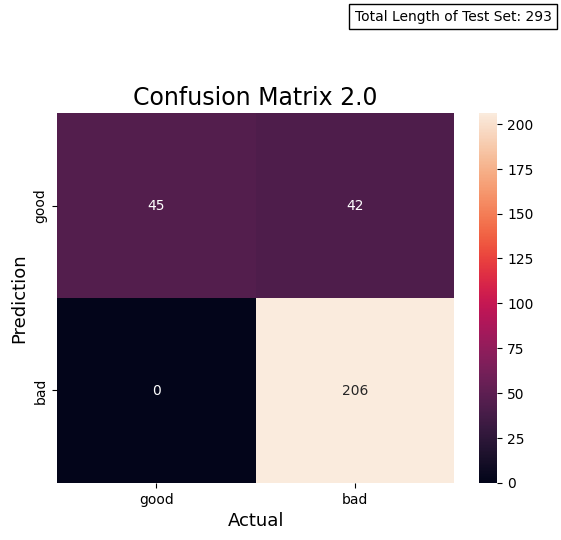

In [107]:
confusion = confusion_matrix(test_actual, test_two)
print(confusion)
sns.heatmap(confusion, 
            annot=True,
            fmt='g', 
            xticklabels=['good', 'bad'],
            yticklabels=['good', 'bad'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix 2.0',fontsize=17)

total_length = len(test_actual)
plt.text(1.5, -0.5, f'Total Length of Test Set: {total_length}', fontsize=10,
         bbox=dict(facecolor='white'))

plt.show()